<a href="https://colab.research.google.com/github/mateusnotgado/SI-project/blob/main/decTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pylab import *

In [ ]:
fonte = 'drive/MyDrive/SI/Rice_Osmancik_Cammeo_Dataset.xlsx'
df = pd.read_excel(fonte)
df

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [ ]:
x = df.drop('CLASS', axis=1)
y = df['CLASS']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [ ]:
x_train


,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
1970,10897,420.554993,168.118652,83.563011,0.867723,11174,0.640849
2267,9862,396.862000,166.761658,75.718491,0.890975,10064,0.640390
247,16734,531.507019,220.695480,97.839333,0.896362,17242,0.657111
1568,11733,436.260010,182.889221,82.626091,0.892128,11955,0.686622
2257,12613,450.205994,184.875732,88.066040,0.879254,12832,0.607299
...,...,...,...,...,...,...,...
3571,10595,403.820007,163.121490,83.779617,0.858028,10832,0.619229
3318,10820,424.781006,178.765762,78.078560,0.899576,11081,0.714852
1574,14960,496.928009,209.662155,91.685341,0.899315,15198,0.760163
3445,13414,459.283997,191.063171,90.209839,0.881520,13611,0.763156


In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [ ]:
treeDepth = clf.get_depth()
print(treeDepth)


20


In [ ]:
yPred = clf.predict(x_test)
yPred

array(['Cammeo', 'Osmancik', 'Cammeo', ..., 'Cammeo', 'Osmancik',
       'Osmancik'], dtype=object)

In [ ]:
resultado =classification_report(y_test, yPred)
print(resultado)

              precision    recall  f1-score   support

      Cammeo       0.89      0.88      0.88       553
    Osmancik       0.90      0.92      0.91       705

    accuracy                           0.90      1258
   macro avg       0.90      0.90      0.90      1258
weighted avg       0.90      0.90      0.90      1258



In [ ]:
cammeo_Gini_precision,cammeo_Gini_recall,cammeo_Gini_f1,osmancik_Gini_precision,osmancik_Gini_recall,osmancik_Gini_f1   = [[],[],[],[],[],[]]
for i in range(1,treeDepth+1):
  clf = tree.DecisionTreeClassifier(max_depth=i)
  clf = clf.fit(x_train, y_train)
  yPred = clf.predict(x_test)
  cammeo_Gini_precision.append(precision_score(y_test, yPred,pos_label='Cammeo'))
  cammeo_Gini_recall.append(recall_score(y_test, yPred,pos_label='Cammeo'))
  cammeo_Gini_f1.append(f1_score(y_test, yPred,pos_label='Cammeo'))
  osmancik_Gini_precision.append(precision_score(y_test, yPred,pos_label='Osmancik'))
  osmancik_Gini_recall.append(recall_score(y_test, yPred,pos_label='Osmancik'))
  osmancik_Gini_f1.append(f1_score(y_test, yPred,pos_label='Osmancik'))

In [ ]:
cammeo_Entropy_precision,cammeo_Entropy_recall,cammeo_Entropy_f1,osmancik_Entropy_precision,osmancik_Entropy_recall,osmancik_Entropy_f1 =  [[],[],[],[],[],[]]
for i in range(1,treeDepth+1):
  clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)
  clf = clf.fit(x_train, y_train)
  yPred = clf.predict(x_test)
  cammeo_Entropy_precision.append(precision_score(y_test, yPred,pos_label='Cammeo'))
  cammeo_Entropy_recall.append(recall_score(y_test, yPred,pos_label='Cammeo'))
  cammeo_Entropy_f1.append(f1_score(y_test, yPred,pos_label='Cammeo'))
  osmancik_Entropy_precision.append(precision_score(y_test, yPred,pos_label='Osmancik'))
  osmancik_Entropy_recall.append(recall_score(y_test, yPred,pos_label='Osmancik'))
  osmancik_Entropy_f1.append(f1_score(y_test, yPred,pos_label='Osmancik'))

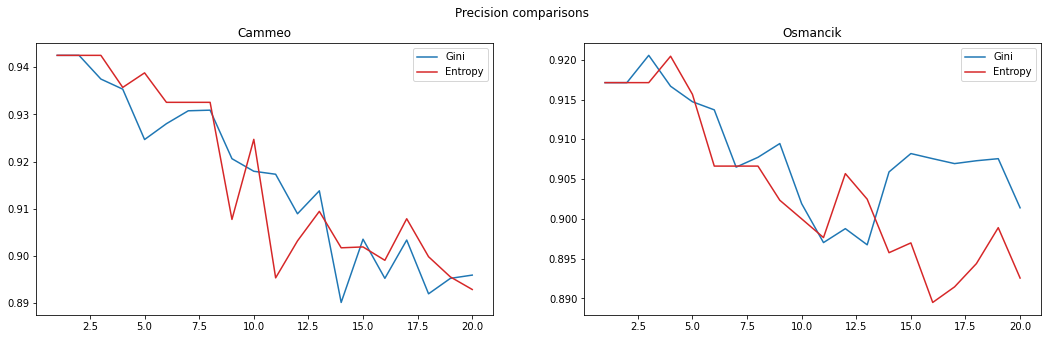

In [ ]:
depth = [i for i in range(1,treeDepth+1)]
fig, axs = plt.subplots( 1,2,figsize=(18,5))
fig.suptitle('Precision comparisons')
axs[0].plot(depth,cammeo_Gini_precision,label='Gini')
axs[0].set_title('Cammeo')
axs[0].plot(depth, cammeo_Entropy_precision, 'tab:red',label='Entropy')
axs[0].legend(loc="upper right")
axs[1].plot(depth, osmancik_Gini_precision, 'tab:blue',label='Gini')
axs[1].set_title('Osmancik')
axs[1].plot(depth, osmancik_Entropy_precision, 'tab:red',label='Entropy')
axs[1].legend(loc="upper right")

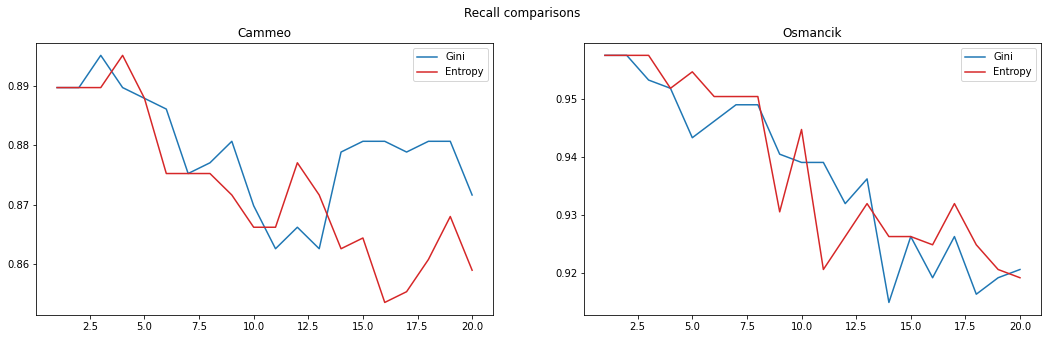

In [ ]:
depth = [i for i in range(1,treeDepth+1)]
fig, axs = plt.subplots(1, 2,figsize=(18,5))
fig.suptitle('Recall comparisons')
axs[0].plot(depth,cammeo_Gini_recall,label='Gini')
axs[0].set_title('Cammeo')
axs[0].plot(depth, cammeo_Entropy_recall, 'tab:red',label='Entropy')
axs[0].legend(loc="upper right")
axs[1].plot(depth, osmancik_Gini_recall, 'tab:blue',label='Gini')
axs[1].set_title('Osmancik')
axs[1].plot(depth, osmancik_Entropy_recall, 'tab:red',label='Entropy')
axs[1].legend(loc="upper right")

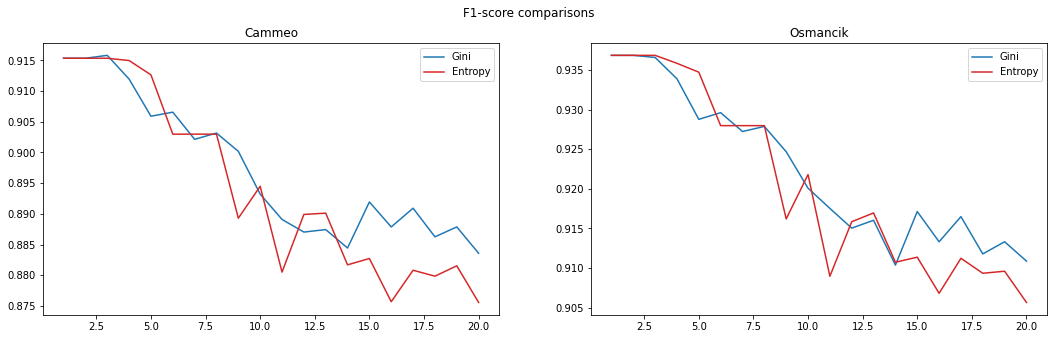

In [ ]:
depth = [i for i in range(1,treeDepth+1)]
fig, axs = plt.subplots(1, 2,figsize=(18,5))
fig.suptitle('F1-score comparisons')
axs[0].plot(depth,cammeo_Gini_f1,label='Gini')
axs[0].set_title('Cammeo')
axs[0].plot(depth, cammeo_Entropy_f1, 'tab:red',label='Entropy')
axs[0].legend(loc="upper right")
axs[1].plot(depth, osmancik_Gini_f1, 'tab:blue',label='Gini')
axs[1].set_title('Osmancik')
axs[1].plot(depth, osmancik_Entropy_f1, 'tab:red',label='Entropy')
axs[1].legend(loc="upper right")

In [ ]:

sum=0
for i in range(0,100):
 x = df.drop('CLASS', axis=1)
 y = df['CLASS']
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(x_train, y_train)
 sum+=clf.get_depth()
avg_tree_depth=int(ceil(sum/100))
print(avg_tree_depth)

20


In [ ]:
a = [[0 for i in range(0,avg_tree_depth)] for i in range(0,6)]
for i in range(0,100):
  for j in range(0,avg_tree_depth):
   x = df.drop('CLASS', axis=1)
   y = df['CLASS']
   x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)
   clf = tree.DecisionTreeClassifier(max_depth=j+1)
   clf = clf.fit(x_train, y_train)
   yPred = clf.predict(x_test)
   a[0][j]+=precision_score(y_test, yPred,pos_label='Cammeo')
   a[1][j]+=precision_score(y_test, yPred,pos_label='Osmancik')
   a[2][j]+=recall_score(y_test, yPred,pos_label='Cammeo')
   a[3][j]+=recall_score(y_test, yPred,pos_label='Osmancik')
   a[4][j]+=f1_score(y_test, yPred,pos_label='Cammeo')
   a[5][j]+=f1_score(y_test, yPred,pos_label='Osmancik')
for i in range (0,6):
  for j in range(0,avg_tree_depth):
    a[i][j]=a[i][j]/100


In [ ]:
b = [[0 for i in range(0,avg_tree_depth)] for i in range(0,6)]
for i in range(0,100):
  for j in range(0,avg_tree_depth):
   x = df.drop('CLASS', axis=1)
   y = df['CLASS']
   x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)
   clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=j+1)
   clf = clf.fit(x_train, y_train)
   yPred = clf.predict(x_test)
   b[0][j]+=precision_score(y_test, yPred,pos_label='Cammeo')
   b[1][j]+=precision_score(y_test, yPred,pos_label='Osmancik')
   b[2][j]+=recall_score(y_test, yPred,pos_label='Cammeo')
   b[3][j]+=recall_score(y_test, yPred,pos_label='Osmancik')
   b[4][j]+=f1_score(y_test, yPred,pos_label='Cammeo')
   b[5][j]+=f1_score(y_test, yPred,pos_label='Osmancik')
for i in range (0,6):
  for j in range(0,avg_tree_depth):
    b[i][j]=b[i][j]/100

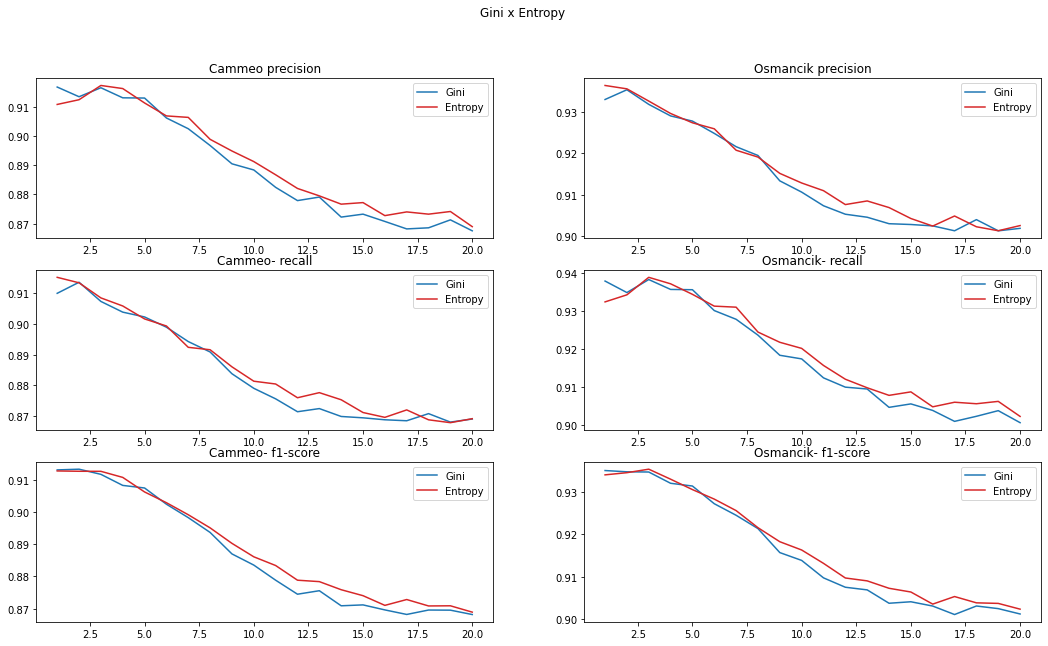

In [ ]:
x = [i for i in range(1,avg_tree_depth+1)]
fig, axs = plt.subplots( 3,2,figsize=(18,10))
fig.suptitle('Gini x Entropy')
axs[0,0].plot(x,a[0],'tab:blue',label='Gini')
axs[0,0].plot(x,b[0],'tab:red',label='Entropy')
axs[0,0].set_title('Cammeo precision')
axs[0,1].plot(x, a[1], 'tab:blue',label='Gini')
axs[0,1].plot(x, b[1], 'tab:red',label='Entropy')
axs[0,1].set_title('Osmancik precision')
axs[1,0].plot(x, a[2], 'tab:blue',label='Gini')
axs[1,0].plot(x, b[2], 'tab:red',label='Entropy')
axs[1,0].set_title('Cammeo- recall')
axs[1,1].plot(x, a[3], 'tab:blue',label='Gini')
axs[1,1].plot(x, b[3], 'tab:red',label='Entropy')
axs[1,1].set_title('Osmancik- recall')
axs[2,0].plot(x, a[4], 'tab:blue',label='Gini')
axs[2,0].plot(x, b[4], 'tab:red',label='Entropy')
axs[2,0].set_title('Cammeo- f1-score')
axs[2,1].plot(x, a[5], 'tab:blue',label='Gini')
axs[2,1].plot(x, b[5], 'tab:red',label='Entropy')
axs[2,1].set_title('Osmancik- f1-score')
axs[0,0].legend(loc="upper right")
axs[0,1].legend(loc="upper right")
axs[1,0].legend(loc="upper right")
axs[1,1].legend(loc="upper right")
axs[2,0].legend(loc="upper right")
axs[2,1].legend(loc="upper right")

In [ ]:
# ignorar essa celula
# aqui foi feito um teste com o atributo class weight e foi descoberto 1,1,1,1,1,1,1,1,1,1,1,1,1,2 mas foi um teste muito preliminar e ignoramos essa celula
min_splt_precision_cammeo=2
min_splt_recall_cammeo=2
min_splt_f1_cammeo=2
min_splt_precision_osmancik=2
min_splt_recall_osmancik=2
min_splt_f1_osmancik=2

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x_train, y_train)
yPred = clf.predict(x_test)

max_precision_cammeo=precision_score(y_test, yPred,pos_label='Cammeo')
max_precision_osmancik=precision_score(y_test, yPred,pos_label='Osmancik')
max_recall_cammeo=recall_score(y_test, yPred,pos_label='Cammeo')
max_recall_osmancik=recall_score(y_test, yPred,pos_label='Osmancik')
max_f1_cammeo=f1_score(y_test, yPred,pos_label='Cammeo')
max_f1_osmancik=f1_score(y_test, yPred,pos_label='Osmancik')



for w in range(1,6):
   for i in range(2,40):
    clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=w,min_samples_split=i,class_weight={'Cammeo': 1, 'Osmancik': 1, 'Cammeo': 1, 'Osmancik': 1, 'Cammeo': 1, 'Osmancik': 1, 'Cammeo': 1, 'Osmancik': 1, 'Cammeo': 1, 'Osmancik': 1, 'Cammeo': 1, 'Osmancik': 1,'Cammeo': 1, 'Osmancik': 2})
    clf.fit(x_train,y_train)
    yPred = clf.predict(x_test)
    p_c=precision_score(y_test, yPred,pos_label='Cammeo')
    p_o=precision_score(y_test, yPred,pos_label='Osmancik')
    r_c=recall_score(y_test, yPred,pos_label='Cammeo')
    r_o=recall_score(y_test, yPred,pos_label='Osmancik')
    f_c=f1_score(y_test, yPred,pos_label='Cammeo')
    f_o=f1_score(y_test, yPred,pos_label='Osmancik')
    if p_c>max_precision_cammeo:
     min_splt_precision_cammeo=i;
     max_precision_cammeo=p_c
    if p_o>max_precision_osmancik:
     min_splt_precision_osmancik=i;
     max_precision_osmancik= p_o
    if r_c>max_recall_cammeo:
     min_splt_recall_cammeo=i;
     max_recall_cammeo=r_c
    if r_o>max_recall_osmancik:
     min_splt_recall_osmancik=i;
     max_recall_osmancik=r_o
    if f_c>max_f1_cammeo:
     min_splt_f1_cammeo=i;
     max_f1_cammeo= f_c
    if f_o>max_f1_osmancik:
     min_splt_f1_osmancik=i;
     max_f1_osmancik=f_o

print(str(max_precision_cammeo )+" "+str(max_precision_osmancik)+" \n "+str(max_recall_cammeo )+" "+str(max_recall_osmancik)+" \n "+str(max_f1_cammeo )+" "+str(max_f1_osmancik))



0.9290187891440501 0.9299867899603699 
 0.8954635108481263 0.9547270306258322 
 0.9026369168356999 0.9372549019607844
